# Internship Program Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("1.internship_program_analysis.csv")

In [4]:
df.shape

(1000, 18)

In [5]:
df.head()

,intern_id,department,duration_weeks,academic_background,enrollment_date,completion_status,completion_date,dropout_week,dropout_reason,mentor_interaction,weekly_hours,final_project_score,mentor_feedback_score,age,gpa,program_year,program_month,completion_numeric
0,INT_0001,Research,8,Computer Science,5/21/2023,Completed,7/16/2023,NaN,NaN,Medium,29.4,88.2,8.9,20,3.60,2023,5,1
1,INT_0002,Research,8,Other,10/7/2023,Dropped Out,NaN,4.0,Academic,Low,21.2,73.1,5.1,18,3.01,2023,10,0
2,INT_0003,Engineering,12,Business,9/16/2023,Completed,12/9/2023,NaN,NaN,High,21.9,94.5,9.7,26,2.59,2023,9,1
3,INT_0004,Data Science,24,Business,8/18/2023,Completed,2/2/2024,NaN,NaN,Medium,30.5,70.9,10.0,30,3.11,2023,8,1
4,INT_0005,Engineering,12,Other,8/5/2023,Completed,10/28/2023,NaN,NaN,Medium,47.8,88.9,8.7,20,2.99,2023,8,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   intern_id              1000 non-null   object 
 1   department             1000 non-null   object 
 2   duration_weeks         1000 non-null   int64  
 3   academic_background    1000 non-null   object 
 4   enrollment_date        1000 non-null   object 
 5   completion_status      1000 non-null   object 
 6   completion_date        748 non-null    object 
 7   dropout_week           252 non-null    float64
 8   dropout_reason         252 non-null    object 
 9   mentor_interaction     1000 non-null   object 
 10  weekly_hours           1000 non-null   float64
 11  final_project_score    1000 non-null   float64
 12  mentor_feedback_score  1000 non-null   float64
 13  age                    1000 non-null   int64  
 14  gpa                    1000 non-null   float64
 15  progr

In [7]:
df.isnull().sum()

intern_id                  0
department                 0
duration_weeks             0
academic_background        0
enrollment_date            0
completion_status          0
completion_date          252
dropout_week             748
dropout_reason           748
mentor_interaction         0
weekly_hours               0
final_project_score        0
mentor_feedback_score      0
age                        0
gpa                        0
program_year               0
program_month              0
completion_numeric         0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.describe()

,duration_weeks,dropout_week,weekly_hours,final_project_score,mentor_feedback_score,age,gpa,program_year,program_month,completion_numeric
count,1000.000000,252.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,14.976000,8.630952,32.237200,80.070700,7.832200,24.094000,3.200960,2023.002000,6.640000,0.748000
std,5.846846,6.025404,7.396632,14.028308,1.794688,3.676776,0.398622,0.044699,3.519487,0.434379
min,8.000000,1.000000,10.000000,20.100000,1.000000,18.000000,2.030000,2023.000000,1.000000,0.000000
25%,12.000000,4.000000,28.000000,73.100000,6.800000,21.000000,2.930000,2023.000000,3.750000,0.000000
50%,16.000000,7.000000,33.150000,82.200000,8.200000,24.000000,3.210000,2023.000000,7.000000,1.000000
75%,16.000000,13.000000,37.500000,90.300000,9.300000,27.000000,3.462500,2023.000000,10.000000,1.000000
max,24.000000,23.000000,49.700000,100.000000,10.000000,30.000000,4.770000,2024.000000,12.000000,1.000000


In [11]:
df.columns

Index(['intern_id', 'department', 'duration_weeks', 'academic_background',
       'enrollment_date', 'completion_status', 'completion_date',
       'dropout_week', 'dropout_reason', 'mentor_interaction', 'weekly_hours',
       'final_project_score', 'mentor_feedback_score', 'age', 'gpa',
       'program_year', 'program_month', 'completion_numeric'],
      dtype='object')

### Set style for better visualizations

In [12]:
plt.style.use('default')
sns.set_palette("husl")

### DATASET OVERVIEW 

In [13]:
print(f"Total records: {len(df):,}")
print(f"Overall completion rate: {(df['completion_status'] == 'Completed').mean():.1%}")
print(f"Date range: {df['enrollment_date'].min()} to {df['enrollment_date'].max()}")

Total records: 1,000
Overall completion rate: 74.8%
Date range: 1/1/2023 to 9/9/2023


In [55]:
print("DEPARTMENT DEEP DIVE")

for dept in df['department'].unique():
    dept_data = df[df['department'] == dept]
    completion_rate = dept_data['completion_numeric'].mean()
    avg_hours = dept_data['weekly_hours'].mean()
    avg_score = dept_data['final_project_score'].mean()
    
    print(f"\n{dept}:")
    print(f"  Completion Rate: {(completion_rate*100):.1f}%")
    print(f"  Avg Weekly Hours: {avg_hours:.1f}")
    print(f"  Avg Project Score: {avg_score:.1f}")
    
    # Mentor distribution in this department
    mentor_dist = dept_data['mentor_interaction'].value_counts()
    print(f"  Mentor Levels: {dict(mentor_dist)}")

DEPARTMENT DEEP DIVE

Research:
  Completion Rate: 81.4%
  Avg Weekly Hours: 32.7
  Avg Project Score: 80.5
  Mentor Levels: {'High': np.int64(92), 'Medium': np.int64(50), 'Low': np.int64(35)}

Engineering:
  Completion Rate: 85.1%
  Avg Weekly Hours: 33.7
  Avg Project Score: 82.0
  Mentor Levels: {'High': np.int64(91), 'Medium': np.int64(46), 'Low': np.int64(31)}

Data Science:
  Completion Rate: 74.3%
  Avg Weekly Hours: 32.0
  Avg Project Score: 80.0
  Mentor Levels: {'Medium': np.int64(89), 'Low': np.int64(65), 'High': np.int64(33)}

Marketing:
  Completion Rate: 68.6%
  Avg Weekly Hours: 31.2
  Avg Project Score: 78.5
  Mentor Levels: {'Medium': np.int64(73), 'Low': np.int64(59), 'High': np.int64(27)}

Business:
  Completion Rate: 66.7%
  Avg Weekly Hours: 31.7
  Avg Project Score: 78.6
  Mentor Levels: {'Medium': np.int64(74), 'Low': np.int64(61), 'High': np.int64(33)}

Design:
  Completion Rate: 71.6%
  Avg Weekly Hours: 31.9
  Avg Project Score: 80.8
  Mentor Levels: {'Low': n

### Completion rate breakdown

In [14]:
completion_counts = df['completion_status'].value_counts()
print(f"Completion Status:")
for status, count in completion_counts.items():
    print(f"  {status}: {count} ({(count/len(df)*100):.1f}%)")

Completion Status:
  Completed: 748 (74.8%)
  Dropped Out: 252 (25.2%)


In [15]:
print("COMPLETION RATES BY CATEGORY")

COMPLETION RATES BY CATEGORY


In [16]:
print("By Department:")
dept_completion = df.groupby('department')['completion_numeric'].agg(['mean', 'count'])
dept_completion['completion_rate'] = (dept_completion['mean'] * 100).round(1)
dept_completion = dept_completion.sort_values('completion_rate', ascending=False)
print(dept_completion[['count', 'completion_rate']])

By Department:
              count  completion_rate
department                          
Engineering     168             85.1
Research        177             81.4
Data Science    187             74.3
Design          141             71.6
Marketing       159             68.6
Business        168             66.7


In [17]:
print("By Mentor Interaction:")
mentor_completion = df.groupby('mentor_interaction')['completion_numeric'].agg(['mean', 'count'])
mentor_completion['completion_rate'] = (mentor_completion['mean'] * 100).round(1)
mentor_completion = mentor_completion.sort_values('completion_rate', ascending=False)
print(mentor_completion[['count', 'completion_rate']])

By Mentor Interaction:
                    count  completion_rate
mentor_interaction                        
High                  311             90.0
Medium                384             74.7
Low                   305             59.3


In [18]:
print("By Duration:")
duration_completion = df.groupby('duration_weeks')['completion_numeric'].agg(['mean', 'count'])
duration_completion['completion_rate'] = (duration_completion['mean'] * 100).round(1)
print(duration_completion[['count', 'completion_rate']])

By Duration:
                count  completion_rate
duration_weeks                        
8                 246             80.9
12                248             83.1
16                264             70.8
24                242             64.5


### PERFORMANCE METRICS ANALYSIS

In [19]:
print("PERFORMANCE METRICS COMPARISON")

PERFORMANCE METRICS COMPARISON


In [20]:
completed = df[df['completion_status'] == 'Completed']
dropped = df[df['completion_status'] == 'Dropped Out']

metrics = ['weekly_hours', 'final_project_score', 'mentor_feedback_score', 'gpa', 'age']

In [21]:
print("Average Metrics Comparison:")
comparison_data = []
for metric in metrics:
    comp_mean = completed[metric].mean()
    drop_mean = dropped[metric].mean()
    diff = comp_mean - drop_mean
    comparison_data.append({
        'Metric': metric,
        'Completed': comp_mean,
        'Dropped': drop_mean,
        'Difference': diff
    })

Average Metrics Comparison:


In [22]:
comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.round(2))

                  Metric  Completed  Dropped  Difference
0           weekly_hours      34.85    24.48       10.37
1    final_project_score      85.15    64.99       20.17
2  mentor_feedback_score       8.43     6.05        2.39
3                    gpa       3.21     3.18        0.03
4                    age      24.09    24.10       -0.00


### DROPOUT ANALYSIS

In [23]:
print("DROPOUT PATTERN ANALYSIS")

DROPOUT PATTERN ANALYSIS


In [24]:
print("Dropout Reasons:")
dropout_reasons = dropped['dropout_reason'].value_counts()
for reason, count in dropout_reasons.items():
    print(f"  {reason}: {count} ({(count/len(dropped)*100):.1f}%)")

Dropout Reasons:
  Health: 59 (23.4%)
  Performance: 54 (21.4%)
  Job Offer: 49 (19.4%)
  Academic: 47 (18.7%)
  Personal: 43 (17.1%)


In [25]:
print(f"Dropout Week Statistics:")
print(f"  Average dropout week: {dropped['dropout_week'].mean():.1f}")
print(f"  Median dropout week: {dropped['dropout_week'].median():.1f}")
print(f"  Most common dropout week: {dropped['dropout_week'].mode().iloc[0]}")

Dropout Week Statistics:
  Average dropout week: 8.6
  Median dropout week: 7.0
  Most common dropout week: 6.0


### CORRELATION ANALYSIS

In [26]:
print("CORRELATION ANALYSIS")

CORRELATION ANALYSIS


In [27]:
numeric_cols = ['duration_weeks', 'weekly_hours', 'final_project_score', 
                'mentor_feedback_score', 'age', 'gpa', 'completion_numeric']

correlation_matrix = df[numeric_cols].corr()
completion_correlations = correlation_matrix['completion_numeric'].sort_values(ascending=False)

print("\nCorrelation with Completion Status:")
for feature, corr in completion_correlations.items():
    if feature != 'completion_numeric':
        print(f"  {feature}: {corr:.3f}")


Correlation with Completion Status:
  final_project_score: 0.624
  weekly_hours: 0.609
  mentor_feedback_score: 0.578
  gpa: 0.029
  age: -0.000
  duration_weeks: -0.158


### TIME-BASED ANALYSIS

In [28]:
print("MONTHLY TRENDS")

MONTHLY TRENDS


In [29]:
monthly_stats = df.groupby('program_month').agg({
    'intern_id': 'count',
    'completion_numeric': 'mean'
}).rename(columns={'intern_id': 'enrollments', 'completion_numeric': 'completion_rate'})

monthly_stats['completion_pct'] = (monthly_stats['completion_rate'] * 100).round(1)
print(monthly_stats[['enrollments', 'completion_pct']])

               enrollments  completion_pct
program_month                             
1                       78            79.5
2                       85            72.9
3                       87            73.6
4                       77            77.9
5                       81            72.8
6                       74            82.4
7                       85            82.4
8                       83            73.5
9                       73            71.2
10                      91            63.7
11                      84            67.9
12                     102            80.4


# VISUALIZATIONS

In [30]:
print("GENERATING VISUALIZATIONS...")

GENERATING VISUALIZATIONS...


### Completion Rate by Department

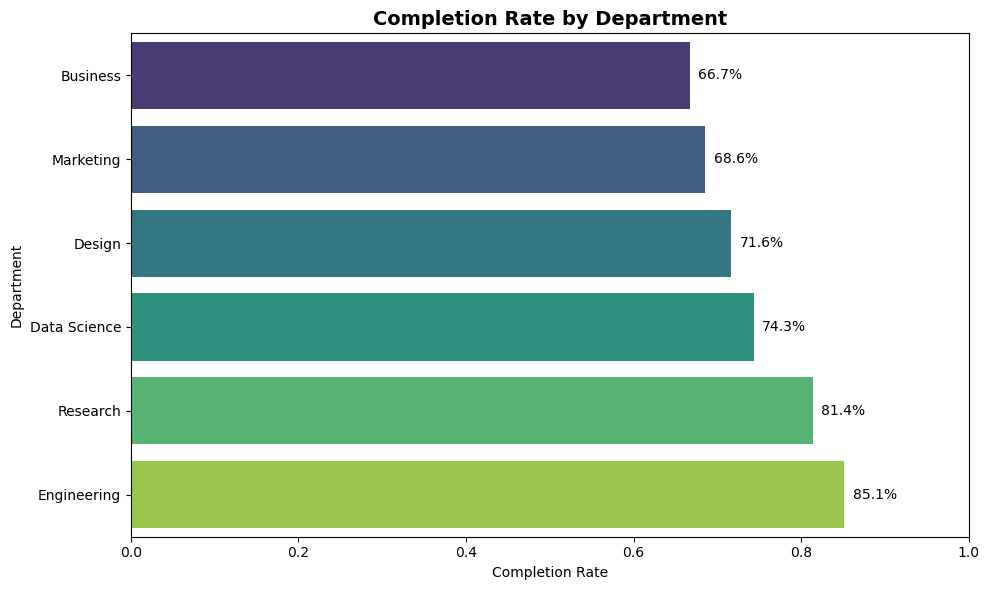

Department Completion Rates:
  Business: 66.7% (168 interns)
  Marketing: 68.6% (159 interns)
  Design: 71.6% (141 interns)
  Data Science: 74.3% (187 interns)
  Research: 81.4% (177 interns)
  Engineering: 85.1% (168 interns)


In [32]:
# Plot 1: Completion Rate by Department
plt.figure(figsize=(10, 6))
dept_completion = df.groupby('department')['completion_numeric'].mean().sort_values(ascending=True)
sns.barplot(x=dept_completion.values, y=dept_completion.index, hue=dept_completion.index, palette='viridis', legend=False)
plt.title('Completion Rate by Department', fontsize=14, fontweight='bold')
plt.xlabel('Completion Rate')
plt.ylabel('Department')
plt.xlim(0, 1)
for i, v in enumerate(dept_completion.values):
    plt.text(v + 0.01, i, f'{v:.1%}', va='center')
plt.tight_layout()
plt.show()

# Print department statistics
print("Department Completion Rates:")
for dept, rate in dept_completion.items():
    count = df[df['department'] == dept].shape[0]
    print(f"  {dept}: {rate:.1%} ({count} interns)")

### Completion Rate by Mentor Interaction

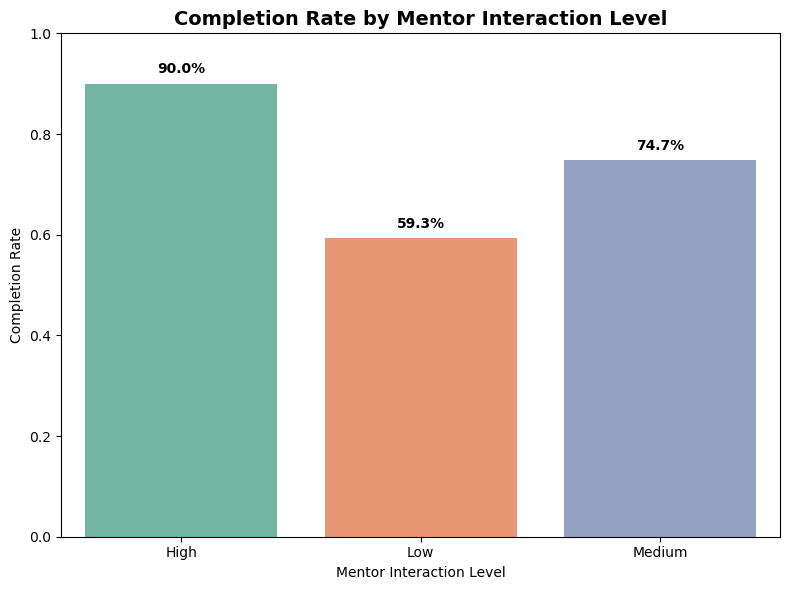

Mentor Interaction Impact:
  High: 90.0% (311 interns)
  Low: 59.3% (305 interns)
  Medium: 74.7% (384 interns)


In [34]:
# Plot 2: Completion Rate by Mentor Interaction
plt.figure(figsize=(8, 6))
mentor_completion = df.groupby('mentor_interaction')['completion_numeric'].mean()
sns.barplot(x=mentor_completion.index, y=mentor_completion.values, hue=mentor_completion.index, palette='Set2', legend=False)
plt.title('Completion Rate by Mentor Interaction Level', fontsize=14, fontweight='bold')
plt.xlabel('Mentor Interaction Level')
plt.ylabel('Completion Rate')
plt.ylim(0, 1)
for i, v in enumerate(mentor_completion.values):
    plt.text(i, v + 0.02, f'{v:.1%}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

# Print mentor statistics
print("Mentor Interaction Impact:")
for level, rate in mentor_completion.items():
    count = df[df['mentor_interaction'] == level].shape[0]
    print(f"  {level}: {rate:.1%} ({count} interns)")

### Performance Metrics Comparison

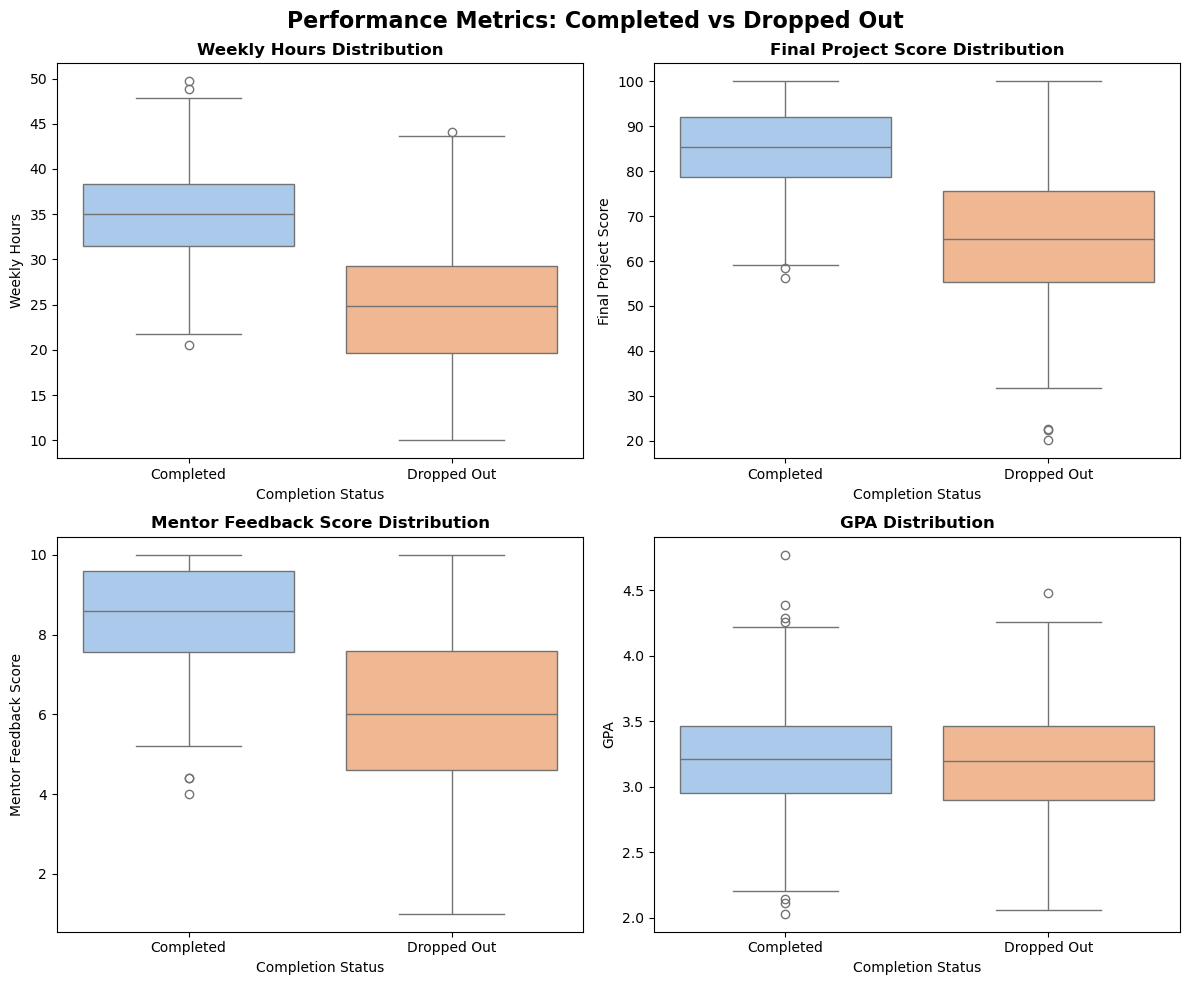

Performance Metrics Comparison (Completed vs Dropped):
  Weekly Hours: 34.8 vs 24.5 (diff: +10.4)
  Final Project Score: 85.2 vs 65.0 (diff: +20.2)
  Mentor Feedback Score: 8.4 vs 6.0 (diff: +2.4)
  GPA: 3.2 vs 3.2 (diff: +0.0)


In [35]:
# Plot 3: Performance Metrics Comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Performance Metrics: Completed vs Dropped Out', fontsize=16, fontweight='bold')

metrics = ['weekly_hours', 'final_project_score', 'mentor_feedback_score', 'gpa']
titles = ['Weekly Hours', 'Final Project Score', 'Mentor Feedback Score', 'GPA']

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[idx//2, idx%2]
    sns.boxplot(data=df, x='completion_status', y=metric, ax=ax, hue='completion_status', palette='pastel', legend=False)
    ax.set_title(f'{title} Distribution', fontweight='bold')
    ax.set_xlabel('Completion Status')
    ax.set_ylabel(title)

plt.tight_layout()
plt.show()

# Print performance differences
print("Performance Metrics Comparison (Completed vs Dropped):")
completed = df[df['completion_status'] == 'Completed']
dropped = df[df['completion_status'] == 'Dropped Out']
for metric, title in zip(metrics, titles):
    comp_mean = completed[metric].mean()
    drop_mean = dropped[metric].mean()
    diff = comp_mean - drop_mean
    print(f"  {title}: {comp_mean:.1f} vs {drop_mean:.1f} (diff: {diff:+.1f})")

### Dropout Reasons Distribution

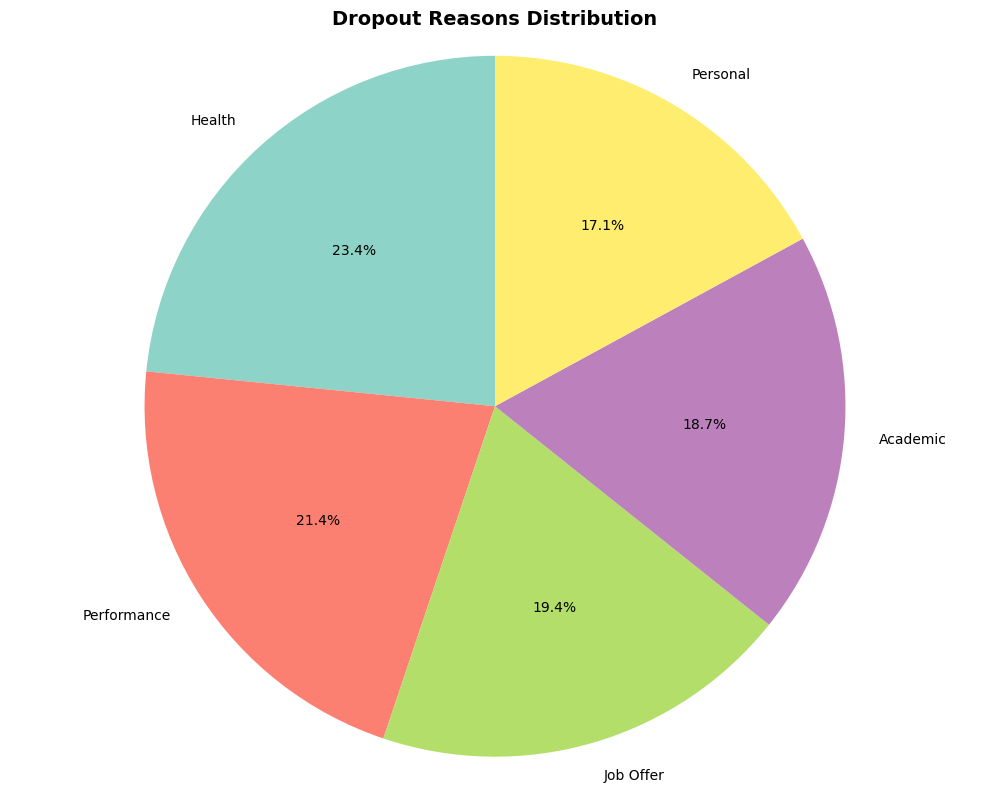

Dropout Reasons:
  Health: 59 (23.4%)
  Performance: 54 (21.4%)
  Job Offer: 49 (19.4%)
  Academic: 47 (18.7%)
  Personal: 43 (17.1%)


In [36]:
# Plot 4: Dropout Reasons Distribution
plt.figure(figsize=(10, 8))
dropout_data = df[df['completion_status'] == 'Dropped Out']
dropout_reasons = dropout_data['dropout_reason'].value_counts()

colors = plt.cm.Set3(np.linspace(0, 1, len(dropout_reasons)))
plt.pie(dropout_reasons.values, labels=dropout_reasons.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, textprops={'fontsize': 10})
plt.title('Dropout Reasons Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Print dropout reason statistics
print("Dropout Reasons:")
total_dropouts = len(dropout_data)
for reason, count in dropout_reasons.items():
    percentage = (count / total_dropouts) * 100
    print(f"  {reason}: {count} ({percentage:.1f}%)")

### Monthly Enrollment & Completion Trends

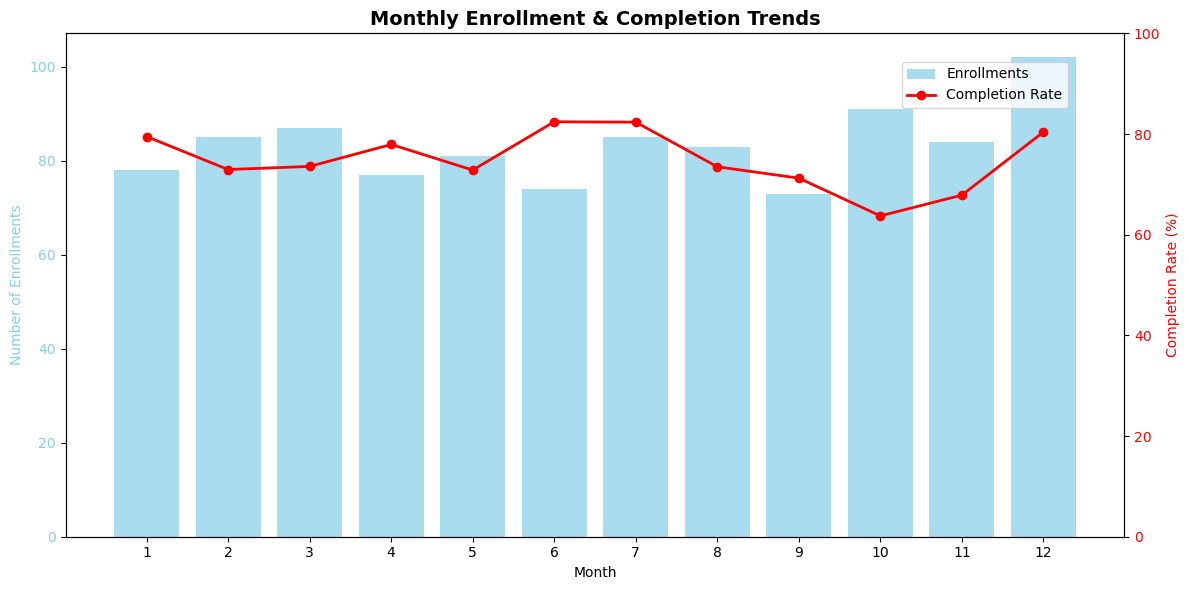

Monthly Trends:
  Month 1: 78 enrollments, 79.5% completion
  Month 2: 85 enrollments, 72.9% completion
  Month 3: 87 enrollments, 73.6% completion
  Month 4: 77 enrollments, 77.9% completion
  Month 5: 81 enrollments, 72.8% completion
  Month 6: 74 enrollments, 82.4% completion
  Month 7: 85 enrollments, 82.4% completion
  Month 8: 83 enrollments, 73.5% completion
  Month 9: 73 enrollments, 71.2% completion
  Month 10: 91 enrollments, 63.7% completion
  Month 11: 84 enrollments, 67.9% completion
  Month 12: 102 enrollments, 80.4% completion


In [37]:
# Plot 5: Monthly Enrollment & Completion Trends
fig, ax1 = plt.subplots(figsize=(12, 6))

# Calculate monthly statistics
monthly_stats = df.groupby('program_month').agg({
    'intern_id': 'count',
    'completion_numeric': 'mean'
}).rename(columns={'intern_id': 'enrollments', 'completion_numeric': 'completion_rate'})

# Bar plot for enrollments
bars = ax1.bar(monthly_stats.index, monthly_stats['enrollments'], 
               color='skyblue', alpha=0.7, label='Enrollments')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Enrollments', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line plot for completion rate
ax2 = ax1.twinx()
line = ax2.plot(monthly_stats.index, monthly_stats['completion_rate'] * 100, 
                color='red', marker='o', linewidth=2, label='Completion Rate')
ax2.set_ylabel('Completion Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 100)

plt.title('Monthly Enrollment & Completion Trends', fontsize=14, fontweight='bold')
plt.xticks(monthly_stats.index)
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))
plt.tight_layout()
plt.show()

# Print monthly statistics
print("Monthly Trends:")
for month in monthly_stats.index:
    enrollments = monthly_stats.loc[month, 'enrollments']
    completion_pct = monthly_stats.loc[month, 'completion_rate'] * 100
    print(f"  Month {month}: {enrollments} enrollments, {completion_pct:.1f}% completion")

### Correlation Heatmap

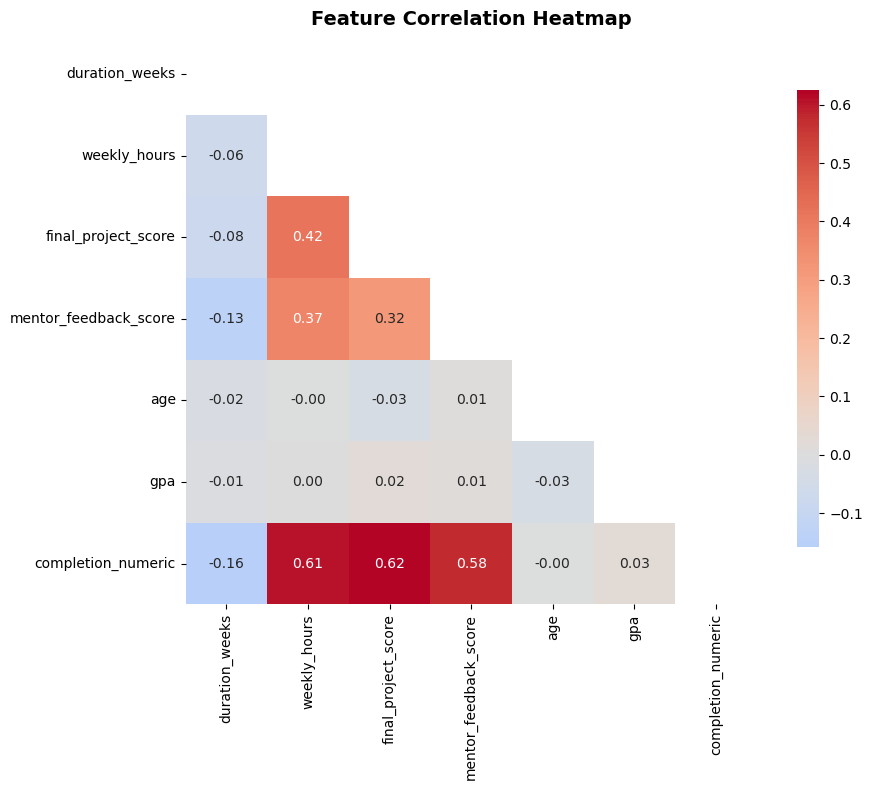

Top Correlations with Completion Status:
  final_project_score: 0.624 (Positive, Strong)
  weekly_hours: 0.609 (Positive, Strong)
  mentor_feedback_score: 0.578 (Positive, Strong)
  gpa: 0.029 (Positive, Weak)
  age: -0.000 (Negative, Weak)
  duration_weeks: -0.158 (Negative, Moderate)


In [38]:
# Plot 6: Correlation Heatmap
plt.figure(figsize=(10, 8))
numeric_cols = ['duration_weeks', 'weekly_hours', 'final_project_score', 
                'mentor_feedback_score', 'age', 'gpa', 'completion_numeric']
correlation_matrix = df[numeric_cols].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
            center=0, square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print top correlations with completion
print("Top Correlations with Completion Status:")
completion_correlations = correlation_matrix['completion_numeric'].sort_values(ascending=False)
for feature, corr in completion_correlations.items():
    if feature != 'completion_numeric':
        strength = "Strong" if abs(corr) > 0.3 else "Moderate" if abs(corr) > 0.1 else "Weak"
        direction = "Positive" if corr > 0 else "Negative"
        print(f"  {feature}: {corr:.3f} ({direction}, {strength})")

### Dropout Week Analysis

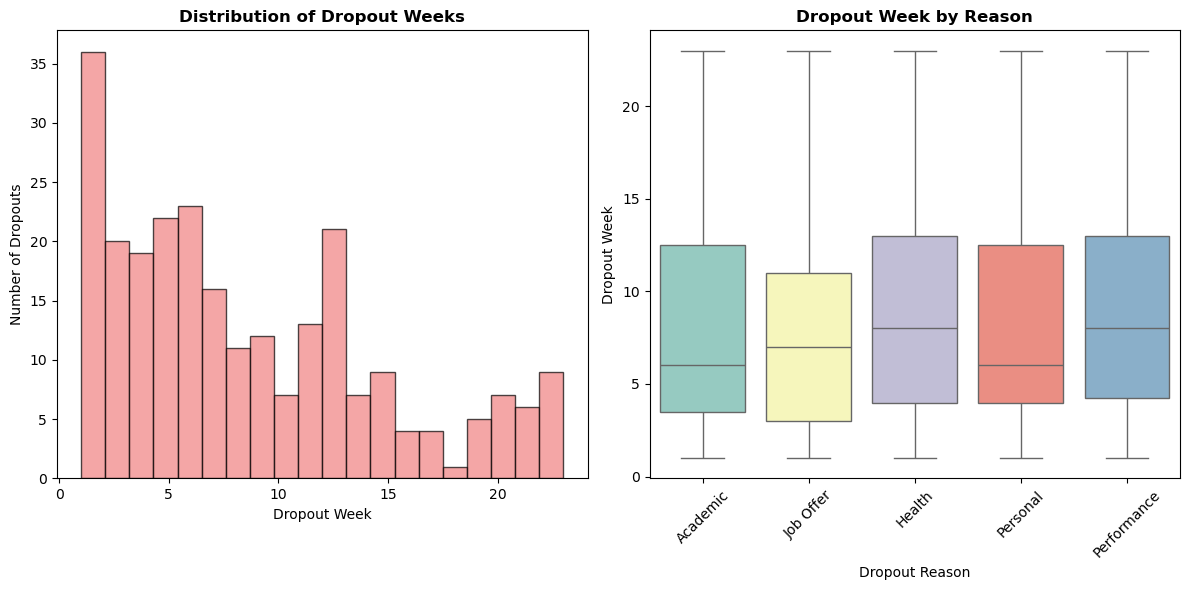

Dropout Week Analysis:
  Average dropout week: 8.6
  Median dropout week: 7.0
  Most common dropout week: 6.0

Dropout week by reason:
  Academic: Week 8.5
  Job Offer: Week 7.9
  Health: Week 9.3
  Personal: Week 8.5
  Performance: Week 8.9


In [40]:
# Plot 7: Dropout Week Analysis
plt.figure(figsize=(12, 6))

# Histogram of dropout weeks
dropout_data = df[df['dropout_week'].notna()]
plt.subplot(1, 2, 1)
plt.hist(dropout_data['dropout_week'], bins=20, color='lightcoral', alpha=0.7, edgecolor='black')
plt.title('Distribution of Dropout Weeks', fontweight='bold')
plt.xlabel('Dropout Week')
plt.ylabel('Number of Dropouts')

# Dropout week by reason
plt.subplot(1, 2, 2)
sns.boxplot(data=dropout_data, x='dropout_reason', y='dropout_week', hue='dropout_reason', palette='Set3', legend=False)
plt.title('Dropout Week by Reason', fontweight='bold')
plt.xlabel('Dropout Reason')
plt.ylabel('Dropout Week')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print dropout week statistics
print("Dropout Week Analysis:")
print(f"  Average dropout week: {dropout_data['dropout_week'].mean():.1f}")
print(f"  Median dropout week: {dropout_data['dropout_week'].median():.1f}")
print(f"  Most common dropout week: {dropout_data['dropout_week'].mode().iloc[0]}")
print("\nDropout week by reason:")
for reason in dropout_data['dropout_reason'].unique():
    reason_data = dropout_data[dropout_data['dropout_reason'] == reason]
    avg_week = reason_data['dropout_week'].mean()
    print(f"  {reason}: Week {avg_week:.1f}")

### Summary of Internship Program Analysis

In [56]:
# Top insights - Overall Summary
dept_completion = df.groupby('department')['completion_numeric'].mean().sort_values(ascending=False)
best_dept = dept_completion.index[0]
best_dept_rate = dept_completion.iloc[0] * 100  # Convert to percentage
worst_dept = dept_completion.index[-1]
worst_dept_rate = dept_completion.iloc[-1] * 100  # Convert to percentage

print(f"Overall Completion Rate: {(df['completion_numeric'].mean()*100):.1f}%")
print(f"Best Department: {best_dept} ({best_dept_rate:.1f}%)")
print(f"Worst Department: {worst_dept} ({worst_dept_rate:.1f}%)")

# Mentor impact - CORRECTED
mentor_completion = df.groupby('mentor_interaction')['completion_numeric'].mean()
mentor_impact = (mentor_completion.loc['High'] - mentor_completion.loc['Low']) * 100
print(f"Mentor Impact: High vs Low = +{mentor_impact:.1f}%")

# Performance gaps
completed = df[df['completion_status'] == 'Completed']
dropped = df[df['completion_status'] == 'Dropped Out']
hours_gap = completed['weekly_hours'].mean() - dropped['weekly_hours'].mean()
score_gap = completed['final_project_score'].mean() - dropped['final_project_score'].mean()
print(f"Hours Gap: Completed interns work {hours_gap:.1f} more hours/week")
print(f"Score Gap: Completed interns score {score_gap:.1f} points higher")

# Most correlated feature - CORRECTED
numeric_cols = ['duration_weeks', 'weekly_hours', 'final_project_score', 
                'mentor_feedback_score', 'age', 'gpa', 'completion_numeric']
correlation_matrix = df[numeric_cols].corr()
completion_correlations = correlation_matrix['completion_numeric'].sort_values(ascending=False)
top_corr_feature = completion_correlations.index[1]  # Skip completion_numeric itself
top_corr_value = completion_correlations.iloc[1]
print(f"Most Correlated Feature: {top_corr_feature} (r = {top_corr_value:.3f})")

# Dropout insights - CORRECTED
dropout_data = df[df['completion_status'] == 'Dropped Out']
dropout_reasons = dropout_data['dropout_reason'].value_counts()
most_common_dropout_reason = dropout_reasons.index[0]
print(f"Most Common Dropout Reason: {most_common_dropout_reason}")

print("Analysis complete! Check 'internship_analysis_dashboard.png' for visualizations.")

Overall Completion Rate: 74.8%
Best Department: Engineering (85.1%)
Worst Department: Business (66.7%)
Mentor Impact: High vs Low = +30.7%
Hours Gap: Completed interns work 10.4 more hours/week
Score Gap: Completed interns score 20.2 points higher
Most Correlated Feature: final_project_score (r = 0.624)
Most Common Dropout Reason: Health
Analysis complete! Check 'internship_analysis_dashboard.png' for visualizations.


In [42]:
# Advanced: Cost-Benefit Analysis
# Calculate the "value" of improving mentor programs
current_completion = df['completion_numeric'].mean()
high_mentor_rate = df[df['mentor_interaction'] == 'High']['completion_numeric'].mean()

improvement_potential = high_mentor_rate - current_completion
print(f"Potential improvement with better mentoring: {improvement_potential:.1%}")

Potential improvement with better mentoring: 15.2%


### Potential Improvements and Recommendations

In [46]:
# Recommendation 1: Focus on Lowest Performing Departments
worst_dept = df.groupby('department')['completion_numeric'].mean().idxmin()
worst_dept_rate = df.groupby('department')['completion_numeric'].mean().min()
best_dept_rate = df.groupby('department')['completion_numeric'].mean().max()
dept_improvement_potential = best_dept_rate - worst_dept_rate

print(f"1. DEPARTMENT FOCUS STRATEGY")
print(f"   Lowest performing department: {worst_dept} ({worst_dept_rate:.1%} completion)")
print(f"   Best department benchmark: {best_dept_rate:.1%} completion")
print(f"   Improvement potential: {dept_improvement_potential:.1%}")
print(f"   Recommendation: Focus resources on improving {worst_dept} department processes")

1. DEPARTMENT FOCUS STRATEGY
   Lowest performing department: Business (66.7% completion)
   Best department benchmark: 85.1% completion
   Improvement potential: 18.5%
   Recommendation: Focus resources on improving Business department processes


In [47]:
print(f"2. PERFORMANCE THRESHOLD STRATEGY")
performance_threshold = 70  # Project score threshold
high_performers = df[df['final_project_score'] >= performance_threshold]
low_performers = df[df['final_project_score'] < performance_threshold]

high_perf_completion = high_performers['completion_numeric'].mean()
low_perf_completion = low_performers['completion_numeric'].mean()
performance_gap = high_perf_completion - low_perf_completion

print(f"   Completion rate for scores ≥{performance_threshold}: {high_perf_completion:.1%}")
print(f"   Completion rate for scores <{performance_threshold}: {low_perf_completion:.1%}")
print(f"   Performance gap: {performance_gap:.1%}")
print(f"   Recommendation: Implement early intervention for interns scoring below {performance_threshold}")

2. PERFORMANCE THRESHOLD STRATEGY
   Completion rate for scores ≥70: 87.7%
   Completion rate for scores <70: 22.7%
   Performance gap: 64.9%
   Recommendation: Implement early intervention for interns scoring below 70


In [48]:
# 3. Duration Optimization Strategy
print(f"3. PROGRAM DURATION OPTIMIZATION")
optimal_duration = df.groupby('duration_weeks')['completion_numeric'].mean().idxmax()
optimal_rate = df.groupby('duration_weeks')['completion_numeric'].mean().max()
current_avg_duration = df['duration_weeks'].mean()
duration_completion = df.groupby('duration_weeks')['completion_numeric'].mean()

print(f"   Optimal program duration: {optimal_duration} weeks ({optimal_rate:.1%} completion)")
print(f"   Current average duration: {current_avg_duration:.1f} weeks")
print(f"   Recommendation: Standardize programs closer to {optimal_duration} weeks for better completion rates")

3. PROGRAM DURATION OPTIMIZATION
   Optimal program duration: 12 weeks (83.1% completion)
   Current average duration: 15.0 weeks
   Recommendation: Standardize programs closer to 12 weeks for better completion rates


In [49]:
# 4. Combined Impact Analysis (Existing + New)
print(f"4. COMBINED STRATEGY IMPACT")
current_completion = df['completion_numeric'].mean()
high_mentor_rate = df[df['mentor_interaction'] == 'High']['completion_numeric'].mean()
optimal_duration_rate = df[df['duration_weeks'] == optimal_duration]['completion_numeric'].mean()

# Conservative estimate of combined impact
combined_impact = (high_mentor_rate + optimal_duration_rate) / 2 - current_completion

print(f"   Current overall completion: {current_completion:.1%}")
print(f"   Potential with improved mentoring: {high_mentor_rate:.1%}")
print(f"   Potential with optimal duration: {optimal_duration_rate:.1%}")
print(f"   Estimated combined improvement: {combined_impact:.1%}")
print(f"   Recommendation: Implement multi-pronged approach for maximum impact")

4. COMBINED STRATEGY IMPACT
   Current overall completion: 74.8%
   Potential with improved mentoring: 90.0%
   Potential with optimal duration: 83.1%
   Estimated combined improvement: 11.7%
   Recommendation: Implement multi-pronged approach for maximum impact
